<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Prueba_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba Kolmogorov-Smirnov**

In [1]:
import scipy.stats as st    #calcular el valor de l estadistico za/2 distribuciones de probabilidad y estadística
import numpy as np          #Cálculo numérico y manejo de arreglos (vectores/matrices)
import tabulate             #Imprime tablas
import matplotlib.pyplot as plt   #Nos ayuda a graficar

Prueba estadisticas para los números pseudoaleatorios.
Para esto podemos plantear una prueba de Kolmogorov-Smirnov donde prueba la hipótesis de la distribución acumulada de una variable aleatoria x en $F_0(x)$.

En esta prueba ordenamos la muestra $x_n$ de menor a mayor y comparamos la frecuencia observada contra la frecuencia esperada, que es la distribución acumulativa $F(x)$.

Establecemos una hipotesis nula $H_0$ la cual se debe de probar y una hipotesis alternativa  $H_a$ (hipotesis de investigación) describira lo que se concluirá si se rechaza la hipotesis nula.


Primero establecemos nuestras hipotesis

Las hipotesis son:

Los datos proviene de :

Hipotesis nula: $$H_0:X_n \sim U  (0,1)$$

Los datos  no proviene de :

Hipotesis alternativa: $$H_a:  X_n \nsim U  (0,1)$$

In [2]:
data = [     #Paso 1.Ingresamos lo datos de la tabla 3.1
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79118, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73485, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

In [3]:
intervalos = [(0,0.2), (0.2,0.4), (0.4,0.6), (0.6,0.8), (0.8,1.0)] #Definimos los intervalos como lo vimos en clase
k = len(intervalos)     #Guardamos los itervalos
N = len(data)           #Guardamos los datos

En esta prueba puede ser descrita por los siguientes pasos.
1. Generar n números pseudoaleatorios uniformes. Este paso utilizamos los números dados por el libro
2. Ordenar los números de la muestra en orden ascendente.
3. Calcular el estadístico Kolmogorov-Smirnov de prueba D a partir de:

$$D^+ = max_1 | \frac {i}{n}-x_i | , \ \ \ \ \  D^-=  max_1 | x_i \frac {i-1}{n}| $$

$D=max(D^+,D^-)$, $i$ es la posición de $x_i$

En esta caso en la formula tambien incluimos el calculo de la distribución acumulada de los números generados.

4. Comparar con el valor crítico.

Si $D<d_{\alpha,n}$ n se rechaza $H_0$

In [4]:
data_ord = np.sort(np.array(data))    #Paso 2. Ordenamos de forma ascendente los parametros
N = len(data_ord)


In [5]:
Fn = np.arange(1, N+1)     #Paso 3. Calculamos la empírica y contruimos las columnas para indicarlos en la tabla
f1_n=(Fn-1)/N
f_n=Fn/N

D_mas = f_n - data_ord      #Calculamos D^+
D_men = f_n - data_ord      #Calculamos D^-

D_mas_m = np.max(D_mas)     #Despues de calcular todas las D^+ solo tomamos la maxima de estas
D_men_m = np.max(D_men)     #Despues de calcular todas las D^- solo tomamos la maxima de estas

D = max(D_mas_m, D_men_m)   #Por ultimo definimos a D como el valor maximo de D^+ y D^- calculadas anteriormente

tabla = []                  #Construimos nuestra tabla dandole un formato
for j in range(N):
    tabla.append([
        int(Fn[j]),
        round(float(data_ord[j]), 5),
        round(float(f1_n[j]), 4),
        round(float(f_n[j]), 4),
        round(float(D_mas [j]), 5),
        round(float(D_men [j]), 5)
    ])

encabezados = ["i", "x_i (ordenado)", "(i-1)/n", "i/n", "D-", "D+"]

print(tabulate.tabulate(tabla, headers=encabezados, tablefmt="grid"))

print("\nMax D^+ =", round(float(D_mas_m), 5))
print("Max D^- =", round(float(D_men_m), 5))
print("D (KS) =", round(float(D), 5))



alpha = 0.05
D_crit = 1.36 / np.sqrt(N)    #Obtenemos el valor critico Kolmogorov-Smirnov como inidca en el libro

print("D =", round(D, 5))
print("D crítico =", round(D_crit, 5))

if D < D_crit:              #Paso4. Comparamos con el valor crítico y nuestra D maxima
    print("NO se rechaza H_0: la muestra proviene de una U(0,1)")
else:
    print("SE rechaza H_0: la muestra NO proviene de una U(0,1)")



+-----+------------------+-----------+-------+----------+----------+
|   i |   x_i (ordenado) |   (i-1)/n |   i/n |       D- |       D+ |
+=====+==================+===========+=======+==========+==========+
|   1 |          0.00121 |      0    |  0.01 |  0.00879 |  0.00879 |
+-----+------------------+-----------+-------+----------+----------+
|   2 |          0.03185 |      0.01 |  0.02 | -0.01185 | -0.01185 |
+-----+------------------+-----------+-------+----------+----------+
|   3 |          0.03272 |      0.02 |  0.03 | -0.00272 | -0.00272 |
+-----+------------------+-----------+-------+----------+----------+
|   4 |          0.0501  |      0.03 |  0.04 | -0.0101  | -0.0101  |
+-----+------------------+-----------+-------+----------+----------+
|   5 |          0.0523  |      0.04 |  0.05 | -0.0023  | -0.0023  |
+-----+------------------+-----------+-------+----------+----------+
|   6 |          0.05475 |      0.05 |  0.06 |  0.00525 |  0.00525 |
+-----+------------------+--------

En nuestra gráfica vemos que F(x) va de 0 a 1, la distribución empírica será un curva escalera de 0 a 1.

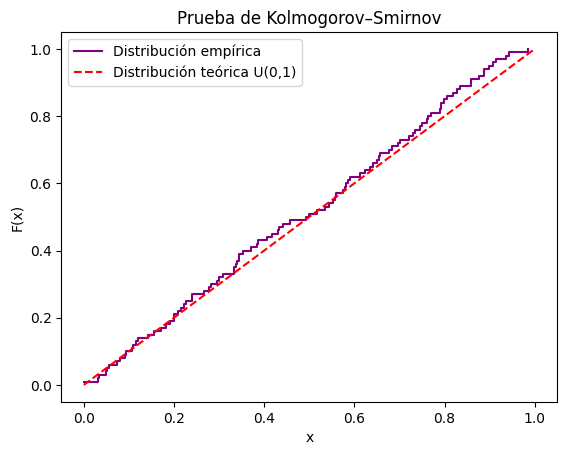

In [6]:
plt.figure()
plt.step(data_ord, f_n, where="post", color="purple", label="Distribución empírica")   # empírica (escalonada)
x_teo = np.linspace(0,1,200)
plt.plot(x_teo, x_teo, color="red", linestyle="--", label="Distribución teórica U(0,1)")#  teórica
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Prueba de Kolmogorov–Smirnov")
plt.legend()
plt.show()

En la prueba de Kolmogorov-Smirnov se compara la función de distribución empírica con la función de distribución teórica de la uniforme. El estadístico Kolmogorov-Smirnov es la máxima diferencia absoluta entre ambas y cuando la diferencia sea menor que el valor crítico, no se rechazara la hipótesis de uniformidad.